In [28]:
import scipy as sp
import IPython
import numpy as np 
import matplotlib.pyplot as plt

sr, audio = sp.io.wavfile.read('examples/que_es_un_filtro.wav')
if audio.dtype == np.int16:
    audio = audio/32767
elif audio.dtype == np.int8:
    audio = audio/127-1

audio = audio.T # fix display.Audio 
IPython.display.Audio(data=audio, rate=sr)

In [29]:
from dispeach.filtering import low_pass_filter
audio_lp = low_pass_filter(audio, 1000, 5, sr)
IPython.display.Audio(data=audio_lp, rate=sr)

In [23]:
def distort(audio: np.ndarray, a: float) -> np.ndarray:
    z = np.pi * a
    s = 1 / np.sin(z)
    b = 1 / a

    audio_distorted = np.zeros_like(audio)
    audio_distorted[audio > b] = 1
    audio_distorted[audio <= b] = np.sin(z * audio[audio <= b]) * s

    return audio_distorted

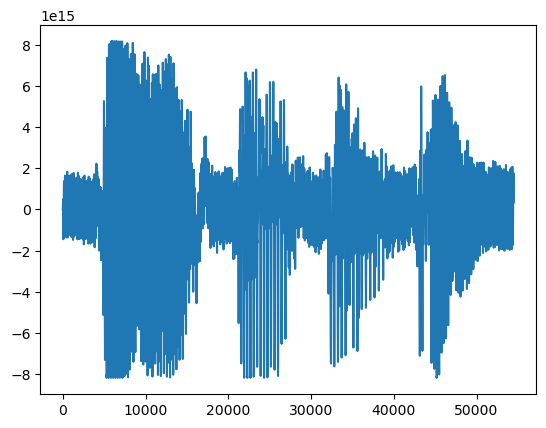

In [ ]:
# first option
audio_distorted = distort(audio_lp, 1)
plt.plot(audio_distorted[0])
IPython.display.Audio(data=audio_distorted, rate=sr)

In [30]:
def harmonic_distortion(signal, distortion_amount=50, harmonic_brightness=50):
        # Normalize parameters to a range suitable for processing
        distortion_amount = distortion_amount / 100.0  # Scale between 0 and 1
        harmonic_brightness = harmonic_brightness / 100.0  # Scale between 0 and 1

        # Apply asymmetric distortion to enhance even harmonics
        distorted_signal = signal + distortion_amount * (signal ** 2) * np.sign(signal)
        
        # Apply harmonic brightness - this acts like a higher order enhancement
        brightness_factor = (1.0 + harmonic_brightness * (signal ** 3)) * np.sign(signal)
        distorted_signal *= brightness_factor

        # Normalize to prevent clipping
        audio_distorted = distorted_signal / np.max(np.abs(distorted_signal))
        
        return audio_distorted

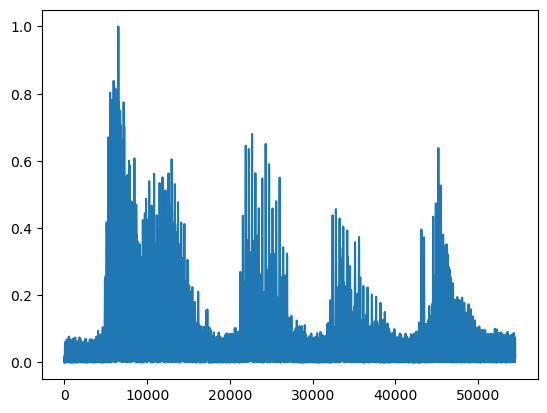

In [ ]:
# second option
audio_distorted = harmonic_distortion(audio_lp)
plt.plot(audio_distorted[0])
IPython.display.Audio(data=audio_distorted, rate=sr)